In [1]:
import math
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']=16
from math import pi,sqrt

In [2]:
N=50
x_start,x_end=-2.,2.
y_start,y_end=-1.,1.
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [3]:
kappa=1.
x_doublet,y_doublet=0.,0.

In [4]:
def get_velocity_doublet(strength,xd,yd,X,Y):
    u=-strength/(2*pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v=-strength/(2*pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u,v
def get_stream_function_doublet(strength,xd,yd,X,Y):
    psi=-strength/(2*pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [5]:
u_doublet,v_doublet=get_velocity_doublet(kappa,x_doublet,y_doublet,X,Y)
psi_doublet=get_stream_function_doublet(kappa,x_doublet,y_doublet,X,Y)

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


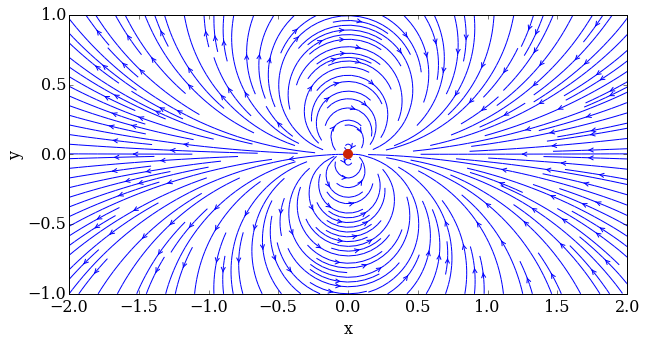

In [6]:
size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u_doublet,v_doublet,density=2,linewidth=1,arrowstyle='->')
pyplot.scatter(x_doublet,y_doublet,color='#CD2305',s=80,marker='o');

In [7]:
u_inf=1.
u_freestream=u_inf*numpy.ones((N,N),dtype=float)
v_freestream=numpy.zeros((N,N),dtype=float)
psi_freestream=u_inf*Y

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


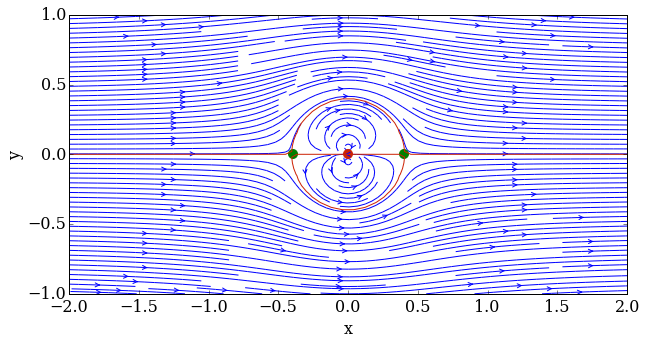

In [8]:
u=u_freestream+u_doublet
v=v_freestream+v_doublet
psi=psi_freestream+psi_doublet

size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidth=2,linestyles='solid')
pyplot.scatter(x_doublet,y_doublet,color='#CD2305',s=80,marker='o')

x_stagn1,y_stagn1=+sqrt(kappa/(2*pi*u_inf)),0
x_stagn2,y_stagn2=-sqrt(kappa/(2*pi*u_inf)),0

pyplot.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='g',s=80,marker='o');

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


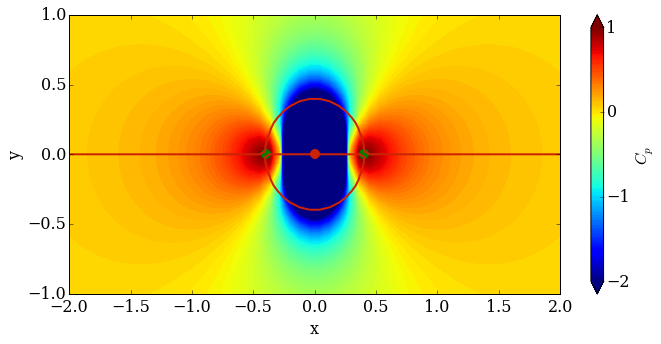

In [9]:
cp=1.-(u**2+v**2)/u_inf**2

size=10
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf=pyplot.contourf(X,Y,cp,levels=numpy.linspace(-2.,1.,100),extend='both')
char=pyplot.colorbar(contf)
char.set_label('$C_p$',fontsize=16)
char.set_ticks([-2.,-1.,0.,1.])
pyplot.scatter(x_doublet,y_doublet,color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid')
pyplot.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='g',s=80,marker='o');

C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\yujia\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


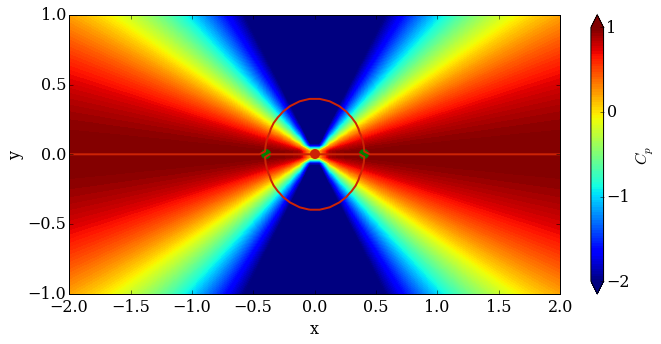

In [10]:
cp2=1-4*Y**2/(X**2+Y**2)

size=10
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf=pyplot.contourf(X,Y,cp2,levels=numpy.linspace(-2.,1.,100),extend='both')
char=pyplot.colorbar(contf)
char.set_label('$C_p$',fontsize=16)
char.set_ticks([-2.,-1.,0.,1.])
pyplot.scatter(x_doublet,y_doublet,color='#CD2305',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#CD2305',linewidths=2,linestyles='solid')
pyplot.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='g',s=80,marker='o');